# Collaborative Filtering
Based on explicitly asking users to rate things/things users do.

In [1]:
import math
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

## Collaborative Filtering
Type of recommendation system based on the preferences of other people who are similar to you.

![](../resources/euclidian_distance.jpeg)

$c = \sqrt{a^2 + b^2}$

For more than one book, create a matrix of their ratings (users are columns, rows are books). You can then calculate the difference between two people and also the squared difference. By finding the square root of the summed squared differences you can find the euclidian distance. 

$\sqrt{\sum (x_i-y_i)^2}$

If someone has only reviewed a couple of the same books as another person, then you can get strange results. You need a decent sample size in common.

## Distance Metrics

In [ ]:
def manhattan_distance(x1, y1, x2, y2):
    distance = abs(x1-x2) + abs(y1-y2)
    return distance

def euclidian_distance(x1, y1, x2, y2):
    x_diff = (x1-x2)
    y_diff = (y1-y2)
    sum_squared_diffs = math.pow(x_diff, 2) + math.pow(y_diff, 2)
    distance = math.sqrt(sum_squared_diffs)
    return distance

## Pearson Correlation

People can rate things differently - for instance someone may like everything and rate it all 4-5 while someone may avoid extremes and rate 2-4. To get around this, you can use Pearson correlation coefficient. If you plot the scores of two people, then if you get a straight line then you can show that they are in agreement. Alternatively, if they're all over the place it means they don't agree. The coefficient ranges between -1 to 1: 1 means perfect agreement, -1 means perfect disagreement.

$$
r = \frac{\sum_{i=1}^{n} x_iy_i - \frac{\sum_{i=1}^{n} x_i \sum_{i=1}^{n} y_i}{n}}
{\sqrt{\sum_{i=1}^{n} x_i^2 - \frac{(\sum_{i=1}^{n} x_i)^2}{n}} \sqrt{\sum_{i=1}^{n} y_i^2 - \frac{(\sum_{i=1}^{n} y_i)^2}{n}}}
$$

## Ratings of Books by 2 People

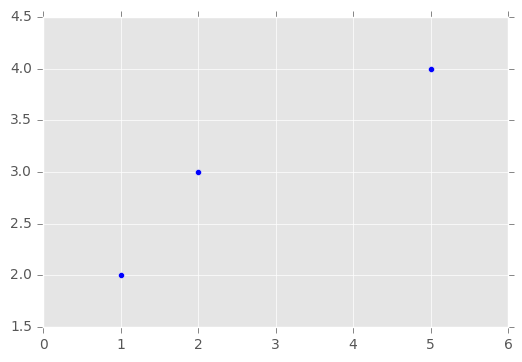

In [24]:
person1 = np.array([5, 1, 2, 2, 5], dtype=np.float64)
person2 = np.array([4, 2, 3, 3, 4], dtype=np.float64)

plt.figure()
plt.scatter(xs, ys)
plt.show()

In [69]:
def pearson_cor(xs, ys):
    n =  len(xs)
    sum_xs = sum(xs)
    sum_ys = sum(ys)
    sum_squared_xs = sum(np.power(xs, 2))
    sum_squared_ys = sum(np.power(ys, 2))
    sum_multiplied_xs_ys = sum(xs * ys)
    
    r = (
        ( sum_multiplied_xs_ys - (sum_xs * sum_ys / n) ) /
        ( math.sqrt(sum_squared_xs - (np.power(sum_xs, 2) / n)) * math.sqrt(sum_squared_ys - (np.power(sum_ys, 2) / n)) )
        )
    return r

pearson_cor(person1, person2)

0.95831484749991047

## Compare Result to SciPy's Implementation

from scipy.stats import pearsonr

pearsonr(person1, person2)

## Cosine Similarity
Cosin similarity ignores 0-0 matches and is useful for sparse datasets with a lot of 0 values. For example, if you want to find people with similar preferences based on how frequently the play different songs on iTunes, you'll have to work with data where they've only listened to a small percentage of the millions of songs available. This is also a useful metric when comparing words used by different books.

$$
cos(x, y) = \frac{x \cdot y}{||x||\times||y||}
$$

$\cdot$ is the dot product of $||x||$ is the length of the vector x. The length of a vector is:

$$
\sqrt{\sum_{i=1}^{n}{x_{i}^{2}}}
$$

The cosine similarity will range from -1 to 1, to indicate perfect positive and negative agreement.

In [75]:
def vector_len(v):
    vl = math.sqrt(sum(np.power(v, 2)))
    return vl
    
def cos_sim(xs, ys):
    cs = sum(xs * ys) / ( vector_len(xs) * vector_len(ys) )
    return cs

In [76]:
cos_sim(person1, person2)

0.95668920621492104

##### Quirks in Preferences
People can have quirks with the things they like (a person may like Mozart and Bach songs in addition to Marilyn Manson, so recommending Marilyn Manson to another lover of classical music might not make sense).

## K-nearest neighbour
Using k-nearest neighbours means you find the k number of most similar to a person and use them to make recommendations.

If the 3 most similar people to me have a pearson correlation of 0.8, 0.7 and 0.5 and they rated a band I haven't heard 4.5, 5 and 3.5, you can determine how much influence they each have by:

In [82]:
similar = [0.5, 0.7, 0.8]
influence = [s / sum(similar) for s in similar]
rating = [4.5, 5, 3.5]
projected_rating = sum([i * r for i, r in zip(influence, rating)])

print(influence)
print(projected_rating)

[0.25, 0.35, 0.4]
4.275
